<a href="https://colab.research.google.com/github/joaopcastro710/Proj_AI/blob/main/Project%202/Proj2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 2, Artificial Intelligence at FEUP

In [1]:
#print("hello")
#print("bye")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#TPU google collab

df = pd.read_csv("https://raw.githubusercontent.com/joaopcastro710/Proj_AI/refs/heads/main/Project%202/merged_dataset.csv")

#treino: Dataset2.csv
#treino: merged_dataset.csv
#teste: Dataset1.csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction.Date    300000 non-null  object 
 1   Transaction.Amount  300000 non-null  float64
 2   Customer.Age        300000 non-null  int64  
 3   Is.Fraudulent       300000 non-null  int64  
 4   Account.Age.Days    300000 non-null  int64  
 5   Transaction.Hour    300000 non-null  int64  
 6   source              300000 non-null  object 
 7   browser             300000 non-null  object 
 8   sex                 300000 non-null  object 
 9   Payment.Method      300000 non-null  object 
 10  Product.Category    300000 non-null  object 
 11  Quantity            300000 non-null  int64  
 12  Device.Used         300000 non-null  object 
 13  Address.Match       300000 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 32.0+ MB
None
       Transaction.Am

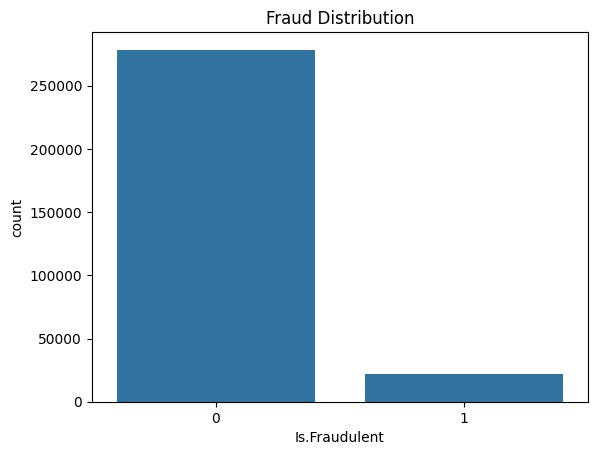

Null values:
Transaction.Date      0
Transaction.Amount    0
Customer.Age          0
Is.Fraudulent         0
Account.Age.Days      0
Transaction.Hour      0
source                0
browser               0
sex                   0
Payment.Method        0
Product.Category      0
Quantity              0
Device.Used           0
Address.Match         0
dtype: int64


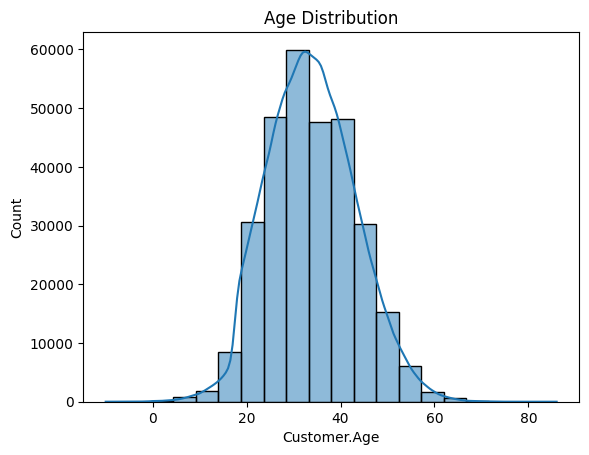

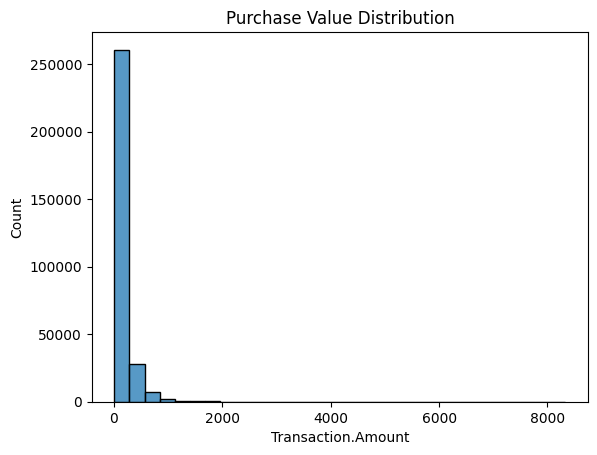

In [2]:
# Preview data - Exploratory analysis
#print(df.head())
print(df.info())
print(df.describe())

sns.countplot(data=df, x='Is.Fraudulent')
plt.title('Fraud Distribution')
plt.show()

print("Null values:")
print(df.isnull().sum())

sns.histplot(df['Customer.Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

sns.histplot(df['Transaction.Amount'], bins=30)
plt.title('Purchase Value Distribution')
plt.show()

In [3]:
df['signup_time'] = pd.to_datetime(df['signup_time'])
df['purchase_time'] = pd.to_datetime(df['purchase_time'])

#feature engineering - new feature (time it took the purchase in seconds)
df['time_to_purchase'] = (df['purchase_time'] - df['signup_time']).dt.total_seconds()

df.drop(['signup_time', 'purchase_time', 'user_id', 'device_id', 'ip_address'], axis=1, inplace=True)
df.describe()

KeyError: 'signup_time'

In [ ]:
#data preprocessing
df = pd.get_dummies(df, columns=['source', 'browser', 'sex'], drop_first=True)

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
def train_and_evaluate(model, name):
    print(f"\ntraining {name}...")
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    end_time = time.time()

    print(f"time in training: {end_time - start_time:.2f} seconds")
    print("Classification report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title(f"{name} - Confusion matrix")
    plt.show()

train_and_evaluate(DecisionTreeClassifier(random_state=42), "Decision Tree")

train_and_evaluate(KNeighborsClassifier(n_neighbors=5), "k-Nearest Neighbors")

train_and_evaluate(SVC(kernel='rbf', random_state=42), "Support Vector Machine")

### Age Analysis

In this section, we explore the variable **Customer.Age** to see how age relates to the likelihood of a transaction being fraudulent. We will:
1. Plot the overall age distribution of our customers.  
2. State our hypothesis.
3. Plot the fraud rate by age (i.e., proportion of transactions flagged as fraud in each age bin).  
4. Summarize our findings and assess whether the data supports the hypothesis.


#### 1. Age Distribution

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df['Customer.Age'], bins=20, kde=True, edgecolor='white')
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

From this histogram we observe:
- Most customers are between 25 and 45 years old, with a peak around the 30-35 zone.
- There are relatively few customers under 20 or over 60, creating long tails at both ends.
- The distribution is slightly right-skewed, indicating a smaller number os older users.

#### 2. Hypothesis

> **Hypothesis**: Customers at the extremes of the age spectrum (that is, under 25 or over 65) are more susceptible to online purchase fraud, either due to inexperience with digital security or less familiarity with modern e-commerce interfaces.

#### 3. Fraud Rate by Age Group

In [ ]:
age_stats = (
    df
    .groupby('Customer.Age')['Is.Fraudulent']
    .agg(fraud_rate='mean', n='count')
    .reset_index()
)

# plot fraud rate curve
plt.figure(figsize=(8,4))
sns.lineplot(
    data=age_stats,
    x='Customer.Age',
    y='fraud_rate',
    marker='o',
    lw=2
)
plt.title("Fraud Rate vs. Customer Age")
plt.xlabel("Age")
plt.ylabel("Fraud Rate")
plt.axhline(df['Is.Fraudulent'].mean(), color='gray', linestyle='--', label='Overall Fraud Rate')
plt.legend()
plt.tight_layout()
plt.show()



Key observations:
- **Under 25**: Above-average fraud rate - likely due to lower awareness of common scams and less experience.
- **25-50**: Below-average fraud rate - this core group balances digital experience and caution.
- **Over 65**: Noticeable peak in fraud rate - possibly reflecting challenges with phishing.

#### 4. Conclusion

- The data supports our hypothesis: the youngest and the oldest age groups indeed exhibit higher fraud rates.

In [ ]:
young = age_stats[age_stats['Customer.Age'] < 25]
senior = age_stats[age_stats['Customer.Age'] > 65]

print("Overall fraud rate: {:.2%}".format(df['Is.Fraudulent'].mean()))
print("\nAverage fraud rate for users <25:  {:.2%}".format(young['fraud_rate'].mean()))
print("Average fraud rate for users >65:  {:.2%}".format(senior['fraud_rate'].mean()))

### Transaction Amount Analysis

In this section, we investigate the **Transaction.Amount** (purchase value) to understand how the size of a purchase relates to fraud risk. We will:
1. Plot the overall distribution of transaction amounts.  
2. State our work hypothesis.  
3. Plot fraud rate by transaction amount bins.  
4. Summarize our findings and draw conclusions.

### 1. Transaction Amount Distribution

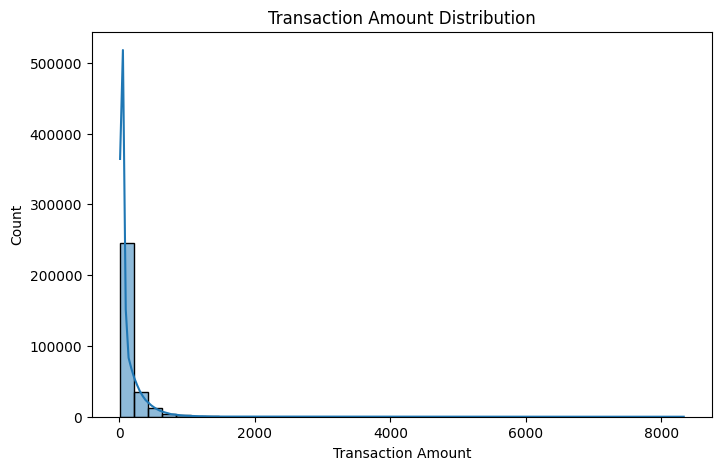

In [4]:
plt.figure(figsize=(8,5))
sns.histplot(df['Transaction.Amount'], bins=40, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.show()

From the histogram we observe:
- A large number of transactions cluster arounf the lower end.
- There is a long right tail of higher-value purchases.
- The distribution is heavily right-skewed, indicating most purchases are small.

#### 2. Hypothesis

> **Hypothesis**: Low-value transactions might be used to test stolen cards or accounts, while the extremely high-value purchases could be attractive targets for fraudsters seeking big payoffs. We are expecting elevated fraud rates at both tails of the transaction-value graph.

#### 3. Fraud Rate by Transaction

<ipython-input-7-d717c9fd2539>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate_by_bin = df.groupby(amount_bins)['Is.Fraudulent'].mean().reset_index()


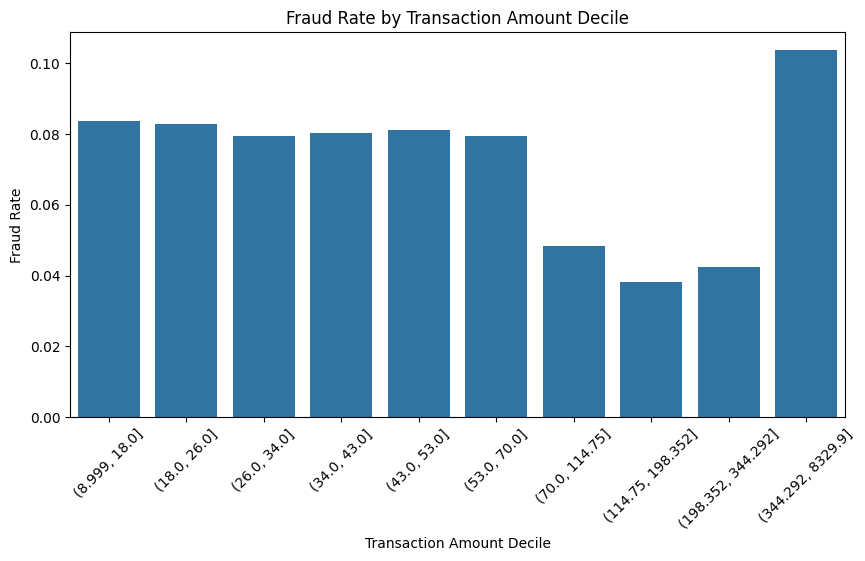

In [ ]:
# 2. Create bins and calculate fraud rate per bin
amount_bins = pd.qcut(df['Transaction.Amount'], q=10, duplicates='drop')
fraud_rate_by_bin = df.groupby(amount_bins)['Is.Fraudulent'].mean().reset_index()

# 3. Plot fraud rate
plt.figure(figsize=(10,5))
sns.barplot(x='Transaction.Amount', y='Is.Fraudulent', data=fraud_rate_by_bin)
plt.xticks(rotation=45)
plt.title('Fraud Rate by Transaction Amount Decile')
plt.xlabel('Transaction Amount Decile')
plt.ylabel('Fraud Rate')
plt.show()


Key observations:
- **Low-Value Transactions**: Fraud rates sit arount 8.3%, notably above the mid-range average.
- **Mid-Low to Mid-Range Transactions**: Fraud rates are relatively stable at 8.0%, slightly lower than the smallest transactions but still elevated.
- **Mid-High Transactions**: There is a drop in the fraud value, going as little as 4.0% to 5.0%.
- **Highest-Value Transaction**: fraud rate spikes to around 10.5%, the highest of all.

#### 4. Conclusions

- U-shaped risk curve: the smallest transactions and the very largest transactions have the highest fraud rates, sitting around 8-8.5% for low values and 10.5% for the highest values.
- In the mid-range transaction amounts, it shows substantially lower fraud rates.

## Account Tenure Analysis

In this section, we analyze account tenure—the number of days between a user’s registration and their purchase (`Account.Age.Days`)—to see if “new” accounts are more susceptible to fraud.  

1. Distribution of account tenure  
2. Work Hypothesis
3. Fraud rate vs. tenure plot  
4. Conclusions


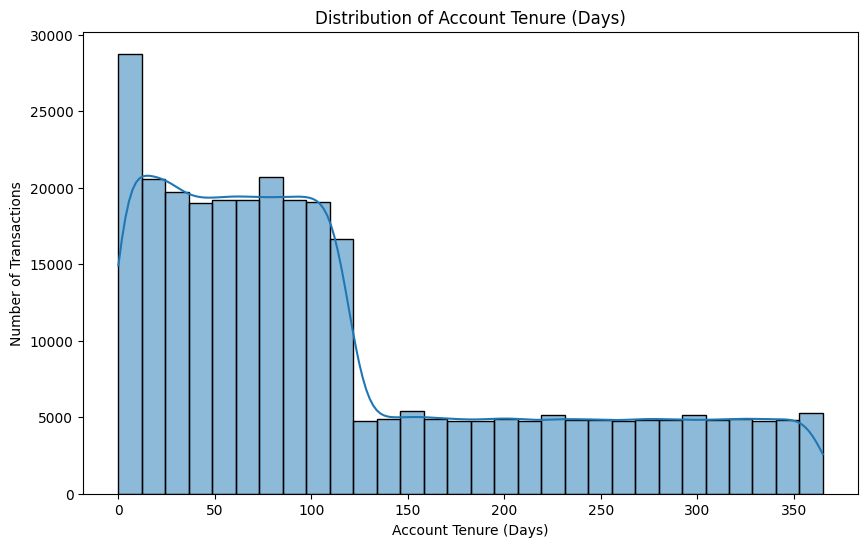

In [5]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Account.Age.Days'], bins=30, kde=True)
plt.title('Distribution of Account Tenure (Days)')
plt.xlabel('Account Tenure (Days)')
plt.ylabel('Number of Transactions')
plt.show()


### Hypothesis

We suspect that transactions made **shortly after** account creation (low `Account.Age.Days`) exhibit **higher fraud rates**—perhaps fraudsters create fresh accounts to exploit one‐off purchases.


<ipython-input-8-03acec08ec55>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate = df.groupby('Tenure.Bin')['Is.Fraudulent'].mean()


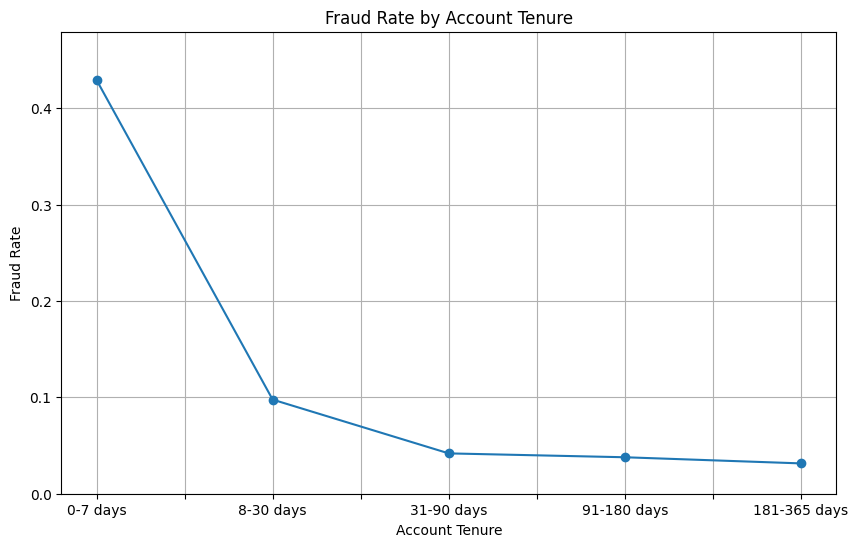

In [8]:

max_days = df['Account.Age.Days'].max()
bins = [0, 7, 30, 90, 180, 365, max_days + 1]
labels = ['0-7 days', '8-30 days', '31-90 days', '91-180 days', '181-365 days', f'>{365} days']

df['Tenure.Bin'] = pd.cut(
    df['Account.Age.Days'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# compute fraud rate per bin
fraud_rate = df.groupby('Tenure.Bin')['Is.Fraudulent'].mean()

# plot
plt.figure(figsize=(10, 6))
fraud_rate.plot(marker='o')
plt.title('Fraud Rate by Account Tenure')
plt.xlabel('Account Tenure')
plt.ylabel('Fraud Rate')
plt.ylim(0, fraud_rate.max() + 0.05)
plt.grid(True)
plt.show()


### Conclusions

- The **tenure distribution** is right-skewed: most transactions occur within the first few months of registration.  
- The **fraud rate** is **highest** in the **0–7 days** bin and steadily **decreases** as tenure grows.  
- This supports our hypothesis: **brand-new accounts** are more likely to be used in fraudulent transactions.  
- **Implication**: consider adding stricter checks (e.g. extra verification) for purchases made within the first week of account creation.


#### Number of items


In this section we explore how the number of items in a transaction relates to fraud risk. We’ll first look at the overall distribution of basket sizes. Our working hypothesis is that very **small** orders (1–2 items) or very **large** orders (e.g. bulk purchases) might be more prone to fraud. Then we’ll compute and plot the fraud rate as a function of basket size. Finally, we’ll summarize our findings.

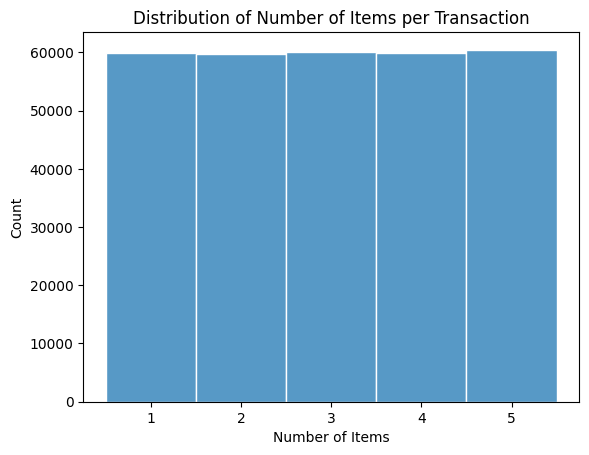

In [10]:
# ---- Distribution of Number of Items ----
sns.histplot(
    df['Quantity'],
    discrete=True,
    bins=range(int(df['Quantity'].min()), int(df['Quantity'].max())+2),
    edgecolor='w'
)
plt.title('Distribution of Number of Items per Transaction')
plt.xlabel('Number of Items')
plt.ylabel('Count')
plt.show()
